# Missing data, dealing with

First creating data with some missing values. 
- Creating a matrix with random ints
- sabotage by adding some nones
- creating index and column names

In [8]:
import numpy as np
import pandas as pd

n=8
np.random.seed(42)
random_matrix = np.random.randint(1,10, (n,n))
random_matrix

array([[7, 4, 8, 5, 7, 3, 7, 8],
       [5, 4, 8, 8, 3, 6, 5, 2],
       [8, 6, 2, 5, 1, 6, 9, 1],
       [3, 7, 4, 9, 3, 5, 3, 7],
       [5, 9, 7, 2, 4, 9, 2, 9],
       [5, 2, 4, 7, 8, 3, 1, 4],
       [2, 8, 4, 2, 6, 6, 4, 6],
       [2, 2, 4, 8, 7, 9, 8, 5]])

In [9]:
random_matrix.shape

(8, 8)

In [10]:
random_matrix.size

64

In [27]:
np.random.seed(42)
index = np.random.choice(random_matrix.size, 10, replace= False)
random_matrix = random_matrix*1.0
random_matrix.ravel()[index] = None
random_matrix

array([[nan,  4.,  8.,  5.,  7., nan,  7.,  8.],
       [ 5.,  4.,  8.,  8., nan,  6.,  5.,  2.],
       [nan,  6.,  2.,  5.,  1.,  6.,  9.,  1.],
       [ 3., nan,  4.,  9.,  3.,  5.,  3.,  7.],
       [ 5.,  9.,  7.,  2., nan,  9.,  2.,  9.],
       [ 5.,  2.,  4.,  7., nan,  3.,  1.,  4.],
       [ 2.,  8.,  4.,  2., nan,  6.,  4.,  6.],
       [ 2.,  2., nan,  8.,  7., nan,  8.,  5.]])

In [30]:
scores = pd.DataFrame(
    random_matrix,
    index=[f"Player {i}" for i in range(1, n + 1)],
    columns=[f"Round {i}" for i in range(1, n + 1)],
)
scores

,Round 1,Round 2,Round 3,Round 4,Round 5,Round 6,Round 7,Round 8
Player 1,NaN,4.0,8.0,5.0,7.0,NaN,7.0,8.0
Player 2,5.0,4.0,8.0,8.0,NaN,6.0,5.0,2.0
Player 3,NaN,6.0,2.0,5.0,1.0,6.0,9.0,1.0
Player 4,3.0,NaN,4.0,9.0,3.0,5.0,3.0,7.0
Player 5,5.0,9.0,7.0,2.0,NaN,9.0,2.0,9.0
Player 6,5.0,2.0,4.0,7.0,NaN,3.0,1.0,4.0
Player 7,2.0,8.0,4.0,2.0,NaN,6.0,4.0,6.0
Player 8,2.0,2.0,NaN,8.0,7.0,NaN,8.0,5.0


## Missing data
- None (phytonic missing data)
- NaN floating point No a Number (numpy)
- NA pd.NA (pandas)

pandas
- isnull() - return true if value is null or None or NA
- notnull() - true if value not null
- dropna() - drops all access with nulls in them
- fillna() - fills null values with certain values

In [31]:
scores.isnull()

,Round 1,Round 2,Round 3,Round 4,Round 5,Round 6,Round 7,Round 8
Player 1,True,False,False,False,False,True,False,False
Player 2,False,False,False,False,True,False,False,False
Player 3,True,False,False,False,False,False,False,False
Player 4,False,True,False,False,False,False,False,False
Player 5,False,False,False,False,True,False,False,False
Player 6,False,False,False,False,True,False,False,False
Player 7,False,False,False,False,True,False,False,False
Player 8,False,False,True,False,False,True,False,False


In [32]:
scores.notnull()

,Round 1,Round 2,Round 3,Round 4,Round 5,Round 6,Round 7,Round 8
Player 1,False,True,True,True,True,False,True,True
Player 2,True,True,True,True,False,True,True,True
Player 3,False,True,True,True,True,True,True,True
Player 4,True,False,True,True,True,True,True,True
Player 5,True,True,True,True,False,True,True,True
Player 6,True,True,True,True,False,True,True,True
Player 7,True,True,True,True,False,True,True,True
Player 8,True,True,False,True,True,False,True,True


In [33]:
scores.notna()

,Round 1,Round 2,Round 3,Round 4,Round 5,Round 6,Round 7,Round 8
Player 1,False,True,True,True,True,False,True,True
Player 2,True,True,True,True,False,True,True,True
Player 3,False,True,True,True,True,True,True,True
Player 4,True,False,True,True,True,True,True,True
Player 5,True,True,True,True,False,True,True,True
Player 6,True,True,True,True,False,True,True,True
Player 7,True,True,True,True,False,True,True,True
Player 8,True,True,False,True,True,False,True,True


In [34]:
scores.dropna()
#all column have nulls in them

,Round 1,Round 2,Round 3,Round 4,Round 5,Round 6,Round 7,Round 8


In [35]:
scores.dropna(axis = 1)
#columns with null values will be dropped

,Round 4,Round 7,Round 8
Player 1,5.0,7.0,8.0
Player 2,8.0,5.0,2.0
Player 3,5.0,9.0,1.0
Player 4,9.0,3.0,7.0
Player 5,2.0,2.0,9.0
Player 6,7.0,1.0,4.0
Player 7,2.0,4.0,6.0
Player 8,8.0,8.0,5.0


In [36]:
scores.fillna(0)
#here fill all null values with 0. Might be the rules for this game for instance

,Round 1,Round 2,Round 3,Round 4,Round 5,Round 6,Round 7,Round 8
Player 1,0.0,4.0,8.0,5.0,7.0,0.0,7.0,8.0
Player 2,5.0,4.0,8.0,8.0,0.0,6.0,5.0,2.0
Player 3,0.0,6.0,2.0,5.0,1.0,6.0,9.0,1.0
Player 4,3.0,0.0,4.0,9.0,3.0,5.0,3.0,7.0
Player 5,5.0,9.0,7.0,2.0,0.0,9.0,2.0,9.0
Player 6,5.0,2.0,4.0,7.0,0.0,3.0,1.0,4.0
Player 7,2.0,8.0,4.0,2.0,0.0,6.0,4.0,6.0
Player 8,2.0,2.0,0.0,8.0,7.0,0.0,8.0,5.0


## Missing data strategy

- data set size
    - small datatset more careful with data
    - large datasets and few nulls, higher chance to remove nulls
- impute missing values (maybe with mean or most frequent)
- domain knowledge
    - e.g rules, scores missing value with 0
    - missing values in columns could be filled with mean or median
    - misssing value between two points -> interpolate in between
    - regression to fill missing value 
- note missing data can negatively impact:
    - data visualastion
    - arithmetic computations and summary stats
    - machine learnign algorithms

In [ ]:
import seaborn as sns

sns.load_dataset("titanic")
## this should work but do not.

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1000)>

In [47]:
#instead I create my own dataframe

titanic = pd.read_csv("data/titanic.csv")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [49]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [50]:
#count the nulls
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<Axes: xlabel='age', ylabel='Count'>

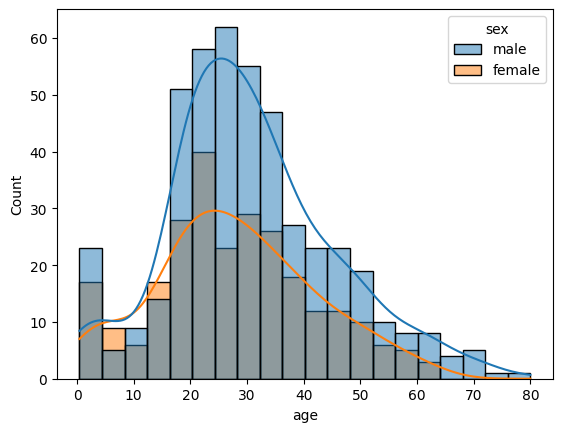

In [53]:
sns.histplot(data=titanic, x= "age", kde = True, hue= "sex")

In [54]:
titanic["sex"].value_counts()

sex
male      577
female    314
Name: count, dtype: int64

In [59]:
# Imagine that we have talked to a historian and this person advices us to use 
# median age of the corresponding gender to fill in the missing ages 
# 177 missing values in age as seen above

#STEP 1 titanic["sex"] == "male" -> True on all male
#STEP 2 titanic[titanic["sex"] == "male"] -> booelan mask
#STEP 3 titanic[titanic["sex"] == "male"]["age"] -> get the age column
#STEP 4 titanic[titanic["sex"] == "male"]["age"].median() -> get the median of the age column
#STEP 4 titanic[titanic["sex"] == "male"]["age"].median() -> get the median of the age column

median_male_age = titanic[titanic["sex"] == "male"]["age"].median()
median_male_age


np.float64(29.0)

In [61]:
# now the women but using query syntax.
median_female_age = titanic.query("sex == 'female'")["age"].median()
median_female_age

np.float64(27.0)

In [64]:
titanic.loc[titanic["sex"] == "male", "age"] = titanic.loc[titanic["sex"] == "male", "age"].fillna(median_male_age)
titanic["age"].head(6)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5    29.0
Name: age, dtype: float64

In [67]:
 titanic.loc[titanic["sex"] == "female", "age"] = titanic.loc[titanic["sex"] == "female", "age"].fillna(median_female_age)
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<Axes: xlabel='age', ylabel='Count'>

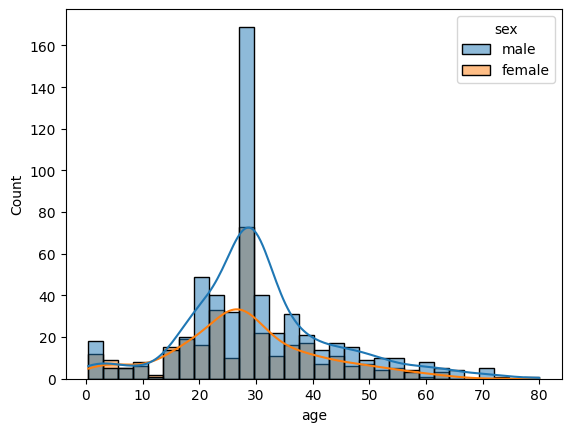

In [69]:
sns.histplot(data=titanic, x="age", kde= True, hue= "sex")

## Aggregations and group by

In [78]:
survivors = titanic.groupby("sex")[["survived", "age"]].mean()
for i in survivors.index:
    survived_percentage = survivors.loc[i, "survived"]*100
    print(f"Percentage survived {i}: {survived_percentage:.1f}")

Percentage survived female: 74.2
Percentage survived male: 18.9


In [81]:
titanic.groupby("class")[["age", "fare"]].max()

,age,fare
class,,
First,80.0,512.3292
Second,70.0,73.5000
Third,74.0,69.5500


In [83]:
titanic.groupby("survived")["sex"].value_counts()

survived  sex   
0         male      468
          female     81
1         female    233
          male      109
Name: count, dtype: int64

In [85]:
titanic.groupby("survived").agg(dict(age= "mean", fare= "median"))

,age,fare
survived,,
0,30.193989,10.5
1,28.232953,26.0
